In [1]:
# imports and libraries
import json
import requests
import pandas as pd
import numpy as np
import ccxt

from binance.client import Client
from binance.enums import *

import datetime as dt
import matplotlib.pyplot as plt

In [9]:
# initialise client and api keys
api_key = 'bed892f626c3e90ab8ac7e8c2d22b6e9a3bd9f86e0bd88b1f65689fcabfd7d45'
api_secret = '39e180b8a6dab8bf8554f2c46f06b1e4800e51466c677df9bc21036b3130ca7b'
client = Client(api_key, api_secret)

In [2]:
# inputs
pair1 = input("Input pair 1: ")
pair2 = input("Input pair 2: ")
timeframe = input("Input timeframe/ interval: ")
emalength = input("Input Lookback/ EMA length: ")
legvalue = float(input("Leg Value: "))

Input pair 1: ONTUSDT
Input pair 2: EOSUSDT
Input timeframe/ interval: 1h
Input Lookback/ EMA length: 20
Leg Value: 5


In [5]:
# create dataframe
def dataframe(symbol, interval, timeframe):
    root_url = 'https://api.binance.com/api/v1/klines'
    url = root_url + '?symbol=' + symbol + '&interval=' + interval + '&limit=' + timeframe
    data = json.loads(requests.get(url).text)
    df = pd.DataFrame(data)
    df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
    df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
    return df
(dataframe(pair1,timeframe, emalength))

,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2020-05-28 23:59:59.999,1590670800000,0.51080000,0.51290000,0.51020000,0.51160000,306810.31000000,1590674399999,156903.36197300,620,180182.73000000,92144.72040900,0
2020-05-29 00:59:59.999,1590674400000,0.51200000,0.51690000,0.51150000,0.51370000,525902.05000000,1590677999999,270467.28099900,1122,284007.16000000,146074.06469700,0
2020-05-29 01:59:59.999,1590678000000,0.51370000,0.51710000,0.51200000,0.51410000,486354.98000000,1590681599999,250269.85019700,969,233769.89000000,120317.73925700,0
2020-05-29 02:59:59.999,1590681600000,0.51450000,0.51510000,0.51210000,0.51280000,356998.41000000,1590685199999,183262.67496300,719,164206.95000000,84279.62153700,0
2020-05-29 03:59:59.999,1590685200000,0.51280000,0.51410000,0.51200000,0.51330000,235730.54000000,1590688799999,120917.22853800,392,124034.16000000,63625.44045100,0
2020-05-29 04:59:59.999,1590688800000,0.51350000,0.51590000,0.51050000,0.51070000,543420.09000000,1590692399999,279334.29936200,1084,215059.94000000,110593.61281200,0
2020-05-29 05:59:59.999,1590692400000,0.51060000,0.51460000,0.50980000,0.51250000,305890.52000000,1590695999999,156746.34948900,658,175374.24000000,89914.42231100,0
2020-05-29 06:59:59.999,1590696000000,0.51260000,0.51370000,0.51110000,0.51250000,135043.40000000,1590699599999,69187.92237400,380,61150.86000000,31335.57615100,0
2020-05-29 07:59:59.999,1590699600000,0.51270000,0.51480000,0.51080000,0.51200000,142382.73000000,1590703199999,73010.70876100,354,78032.02000000,40035.51562300,0
2020-05-29 08:59:59.999,1590703200000,0.51200000,0.52170000,0.51200000,0.52170000,471997.82000000,1590706799999,244448.04408600,1061,299651.56000000,155181.34304400,0


In [14]:
# price function
def price_chart():
    pair1Chart= dataframe(pair1,timeframe, emalength)
    pair2Chart = dataframe(pair2,timeframe, emalength)

    pair1ChartClose = pair1Chart['c'].astype('float')
    pair2ChartClose = pair2Chart['c'].astype('float')

    hedgeChart = pair1ChartClose / pair2ChartClose
    return hedgeChart

print(type(price_chart()))
price_chart()

<class 'pandas.core.series.Series'>


2020-05-28 02:59:59.999    0.197634
2020-05-28 03:59:59.999    0.196767
2020-05-28 04:59:59.999    0.195712
2020-05-28 05:59:59.999    0.196021
2020-05-28 06:59:59.999    0.196538
2020-05-28 07:59:59.999    0.195744
2020-05-28 08:59:59.999    0.196158
2020-05-28 09:59:59.999    0.196345
2020-05-28 10:59:59.999    0.195896
2020-05-28 11:59:59.999    0.195630
2020-05-28 12:59:59.999    0.195827
2020-05-28 13:59:59.999    0.195700
2020-05-28 14:59:59.999    0.196705
2020-05-28 15:59:59.999    0.201022
2020-05-28 16:59:59.999    0.200126
2020-05-28 17:59:59.999    0.198925
2020-05-28 18:59:59.999    0.200087
2020-05-28 19:59:59.999    0.200189
2020-05-28 20:59:59.999    0.201483
2020-05-28 21:59:59.999    0.201720
Name: c, dtype: float64

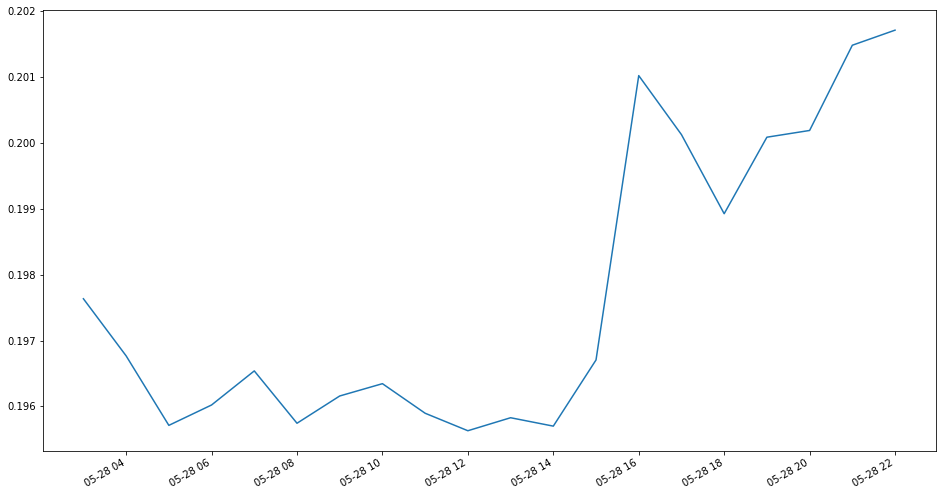

In [15]:
# prints price chart
price_chart().plot(figsize=(16,9))

In [16]:
# current zscore
def currZscore():
    currStd = price_chart().std()
    currMean = price_chart().mean()
    a = price_chart().to_list()
    x = a[-1:]
    
    y = [float(i) for i in x]

    zscore = (y[0] - currMean)/currStd
    return zscore

print("Current Z-Score = %s" % currZscore())

Current Z-Score = 1.844523145925362


In [17]:
    price_pair1 = dataframe(pair1,timeframe,emalength)['c'].astype('float')[-1].tolist()
    price_pair2 = dataframe(pair2,timeframe,emalength)['c'].astype('float')[-1].tolist()

    amount_pair1 = legvalue/price_pair1
    amount_pair2 = legvalue/price_pair2
            
    # short pair1
    order1 = client.order_market_sell(
    symbol=pair1,
    quantity=amount_pair1)
    
    # long pair 2
    order2 = client.order_market_buy(
    symbol=pair2,
    quantity=amount_pair2)

NameError: name 'BinanceFuturesPy' is not defined

In [10]:
# buy condition and checks
shortZscore = -2
longZscore = 2

if currZscore() <= shortZscore:
    short_entry = True
    long_entry = False
    short_entry()
elif currZscore() >= longZscore:
    long_entry = True
    short_entry = False
    long_entry()

In [42]:
# short entry
def short_entry(pair1, pair2, legvalue):
    price_pair1 = dataframe(pair1,timeframe,emalength)['c'].astype('float')[-1].tolist()
    price_pair2 = dataframe(pair2,timeframe,emalength)['c'].astype('float')[-1].tolist()

    amount_pair1 = legvalue/price_pair1
    amount_pair2 = legvalue/price_pair2
    
    # short pair1
    order1 = client.order_market_sell(
    symbol=pair1,
    quantity=amount_pair1)
    
    # long pair 2
    order2 = client.order_market_buy(
    symbol=pair2,
    quantity=amount_pair2)
    
    # record entry
    #record_entry()
    #entry_record = True

In [ ]:
# long entry
def long_entry(pair1, pair2, legvalue):
    price_pair1 = dataframe(pair1,timeframe,emalength)['c'].astype('float')[-1].tolist()
    price_pair2 = dataframe(pair2,timeframe,emalength)['c'].astype('float')[-1].tolist()

    amount_pair1 = legvalue/price_pair1
    amount_pair2 = legvalue/price_pair2
    
    # long pair1
    order1 = client.order_market_buy(
    symbol=pair1,
    quantity=amount_pair1)
    
    # short pair 2
    order2 = client.order_market_sell(
    symbol=pair2,
    quantity=amount_pair2)
    
    # record entry
    #record_entry()
    #entry_record = True

In [ ]:
def record_entry():
    pair1_p_record = price_pair1
    pair2_p_record = price_pair2
    
    pair1_a_record = amount_pair1
    pair2_a_record = amount_pair2

In [ ]:
# sell condition
# long condition or short condition
if entry_record == True:
    if short_entry == True & currZscore() >= 0:
        short_exit()
        short_entry = False
        entry_record = False
    elif long_entry == True & currZscore() <= 0:
        long_exit()
        long_entry = False
        entry_record = False

In [ ]:
# short exit
def short_exit():
    #
    price_pair1 = dataframe(pair1,timeframe,emalength)['c'].astype('float')[-1].tolist()
    price_pair2 = dataframe(pair2,timeframe,emalength)['c'].astype('float')[-1].tolist()

    amount_pair1 = legvalue/price_pair1
    amount_pair2 = legvalue/price_pair2
    
    # long pair1
    order1 = client.order_market_buy(
    symbol=pair1,
    quantity=amount_pair1)
    
    # short pair 2
    order2 = client.order_market_sell(
    symbol=pair2,
    quantity=amount_pair2)
    
    
    # record entry
    record_entry()
    entry_record = True
    

In [ ]:
# long_exit
def long_exit():
    
    price_pair1 = dataframe(pair1,timeframe,emalength)['c'].astype('float')[-1].tolist()
    price_pair2 = dataframe(pair2,timeframe,emalength)['c'].astype('float')[-1].tolist()

    amount_pair1 = legvalue/price_pair1
    amount_pair2 = legvalue/price_pair2
    
    # short pair1
    order1 = client.order_market_sell(
    symbol=pair1,
    quantity=amount_pair1)
    
    # long pair 2
    order2 = client.order_market_buy(
    symbol=pair2,
    quantity=amount_pair2)
    
    # record entry
    record_entry()
    entry_record = True